# Linear Regression 

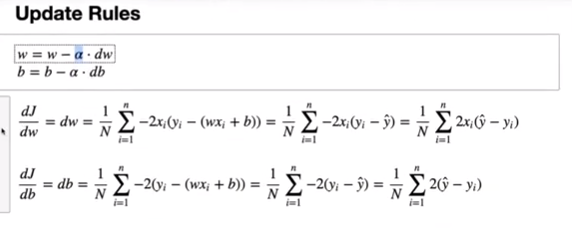

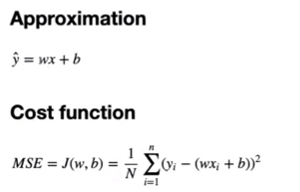

### Class Linear Regression with

1. init
2. fit
3. Predict

#### Initialization

- Learning rate and number of iterations as any value
- bias and weight as none

#### Fitting

- Take the number of samples and number of features
- Assign initial weight as an array of zeroes of the size of number of features
- Assign initial bias as 0

##### Gradient Descenting

- run for n_iter times
- calculate y predicted as the formula
- calculate the derivative of weight and bias, as per the formula
- update weight and bias

#### Predictions

- Calculate $\hat{y}$ as per the formula
- return the calculated value

In [1]:
class LinearRegression:

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        '''
        Fit method takes the features `X` and `y` target
        build a linear model and calculate the weights and bias
        dynamically using `dw` and `db` and update the weights
        and bias using gradient descenting. 
        '''
        n_samples, n_features = X.shape

        # initalize the weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0


        # Start the learn algorithm gradient descenting
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute the weights and bias dynamically 
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update the weights and bias with actual
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return np.array(y_predicted)

# Logistic Regression

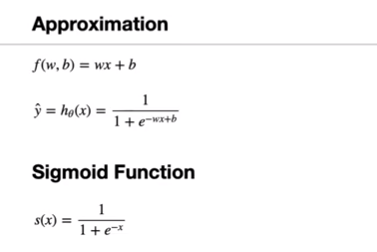

This is known as cross entropy: 
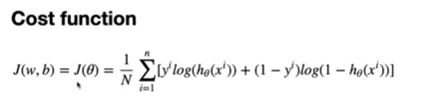

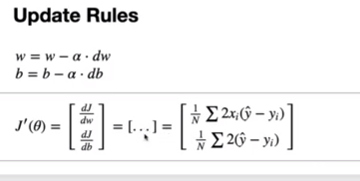

### Class Logistic Regression with

1. init
2. Fit
3. Predict

#### Init

- Learning rate and number of iterations as any value
- bias and weight as none

#### Fit

- Take the number of samples and features in the dataset
- Assign the initial weight of the weight array as 0, of the size of number of features
- Assign the initial bias as 0

##### Gradient Descenting

- Goes on for n_iter times
- Calculate the $\hat{y}$ as per the formula
- Calculate the derivatives of weight and bias, as per the formula
- Update weight and bias according to the formula

#### Predict

- Calculate the $\hat{y}$ as per the formula
- According to the threshold given, classify it to either class 1 or 0
- Return the classes

In [4]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Naive Bayes

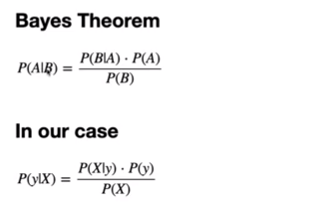

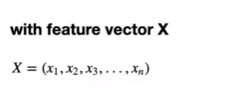

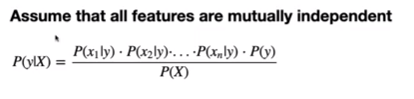

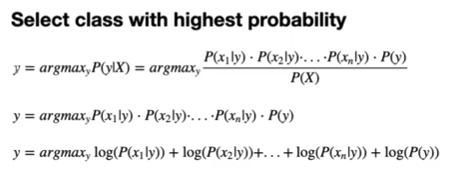

# Perceptron

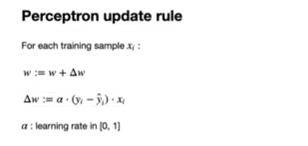

### Class Perceptron with

1. init
2. Fit
3. Predict

#### init

- Initialize the learning rate and number of iteration with some numbers
- Initialize the activation function as needed
- Assign initial weight as an array of zero 
- Assign initial bias as zero

#### fit

- Get the size of samples and features
- Change the dataset into binary target variables
- Loop through each observation, to get the $\hat{y}$ as per the formula
- Update the weight and bias as per the formula

#### Predict

- Calculate the $\hat{y}$ as per the formula and return

In [6]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1,0) 

# SVM

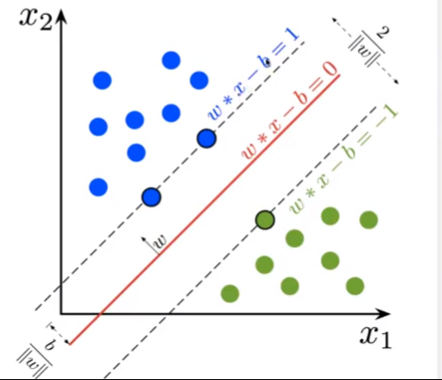

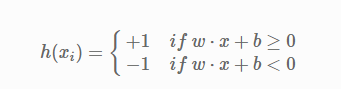

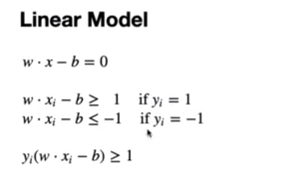

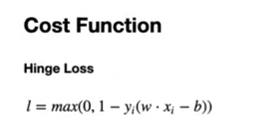

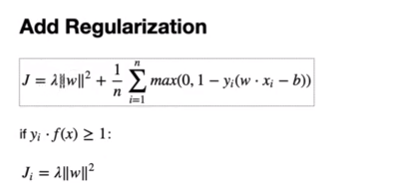

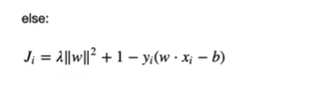

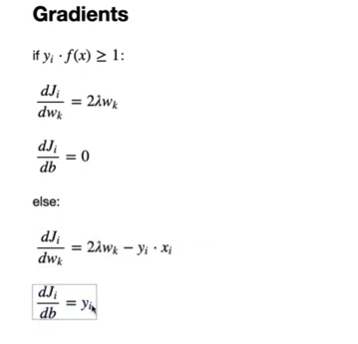

### Class SVM with

1. init
2. fit
3. predict

#### init

- Assign initial learning rate and number of iterations
- Assign initial lambda param, which is a regularizing parameter to the cost function, which maximizes the margin
- Assign weight and bias as None

#### fit

- Get the size of parameters and samples
- change the class labels as -1 and +1
- Assign the weight array as a zeroes of the size of features
- Assign bias as 0

##### Gradient Descenting
- Goes for n_iter times
- Based on the formula, check if $y_i\cdot f(x) \geq -1$ or not
- Based on the above condition set the bias and weight

#### Predict

- Get the predicted value, based on the formula
- Return the sign

In [7]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# PCA

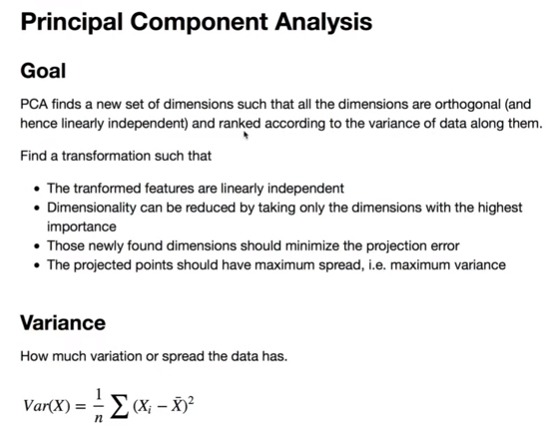

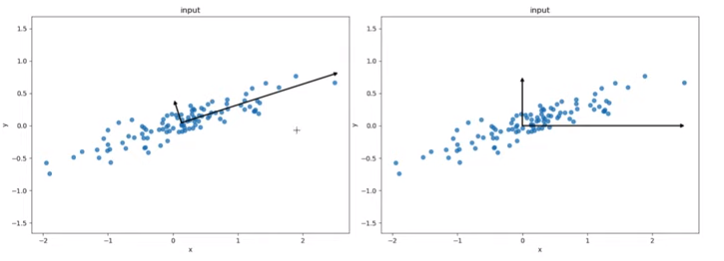

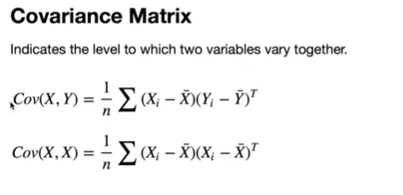

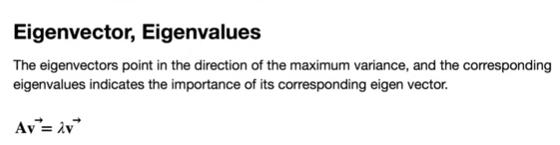

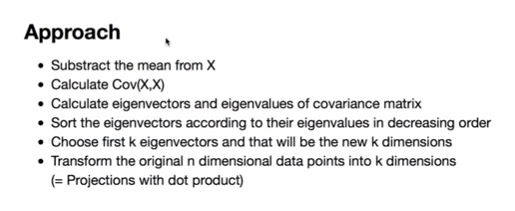

In [10]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

# Stat tests

## Normality Tests

##### Shapiro Wilk
##### D’Agostino’s K-squared test
##### Anderson-Darling Normality Test
##### Chi-Square Normality Test
##### Lilliefors Test for Normality
##### Jarque–Bera test for Normality
##### Kolmogorov-Smirnov test for Normality

<hr>



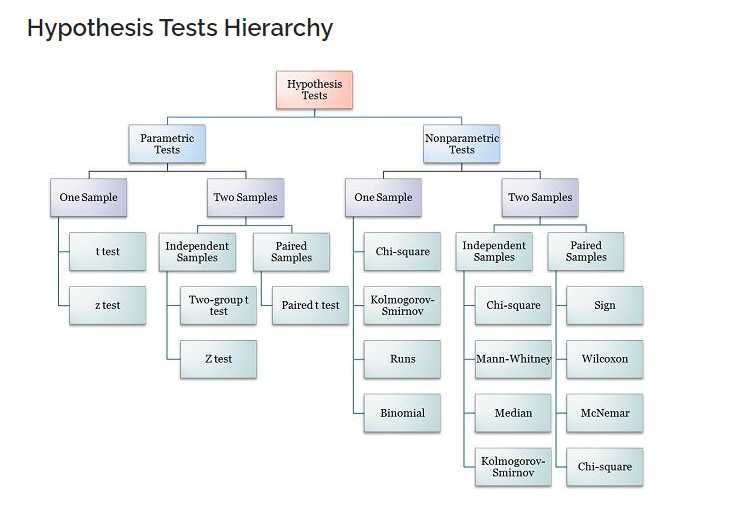

# PCA and MDS

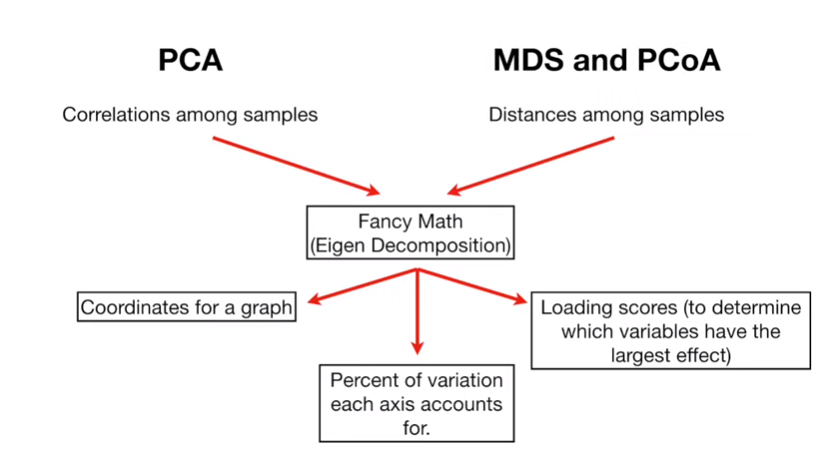

# KMeans

## KMeans Algorithm

##### Start
- Select K clusters

##### Iteratively
- Randomly select K points in the data
- Measure the distance of the a point to the K clusters, assign the point to the nearest cluster
- Calculate the mean of each cluster
- Measure and cluster using the mean value
- Calculate the total variance of each cluster

##### End
- Select the attempt with most equally spread variance

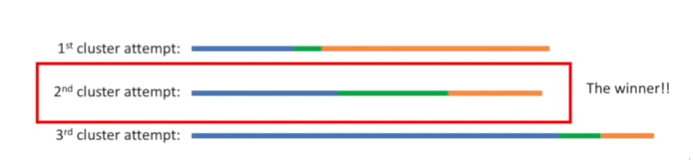